# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [264]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = mouse_metadata.merge(study_results, how = "outer", on= "Mouse ID")

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [265]:
# Checking the number of mice.
len(merged_data_df["Mouse ID"].unique())

249

In [266]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Group by Mouse ID and Timepoint
id_time_grouped = merged_data_df.groupby(["Mouse ID", "Timepoint"])
#Re-order columns for clarity of Mouse ID and Timepoints
id_time_organized = id_time_grouped[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
#Count the number of times each mouse ID and timepoint shows up
counts = id_time_organized.size().reset_index(name="count")
#Show only duplicated instances of Mouse ID and Timepoint
duplicates = counts[counts["count"] > 1]
#Identify the Mouse ID number from the duplicated mice
duplicate_mice = duplicates["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [267]:
# Optional: Get all the data for the duplicate mouse ID.
g989_df = merged_data_df[merged_data_df["Mouse ID"] == "g989"]
g989_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0


In [268]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#id_time_organized.head()
cleaned_mouse_df = merged_data_df[merged_data_df["Mouse ID"] != "g989"]
cleaned_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [269]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [270]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


In [271]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics=cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Time Points')

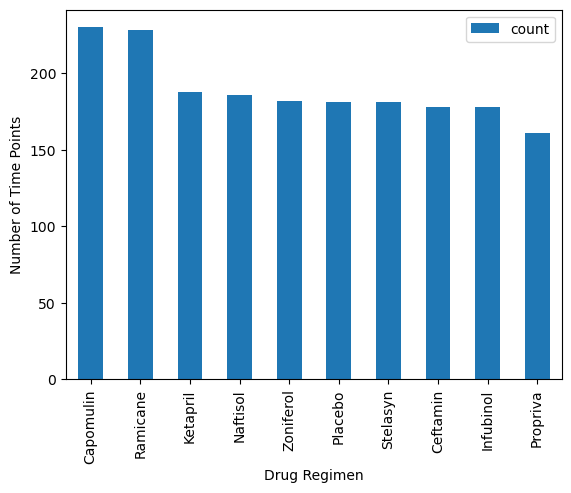

In [272]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Create a dataframe with counts of each drug regimen
drug_counts = merged_data_df.value_counts("Drug Regimen")
#Store drug regimen and count series in a dataframe
drug_counts_df=pd.DataFrame(drug_counts)
#Plot the drug regimen and counts columns, uses index by default
bar_graph = drug_counts_df.plot(kind="bar", y = "count")
#Define the y axes label
bar_graph.set_ylabel("Number of Time Points")


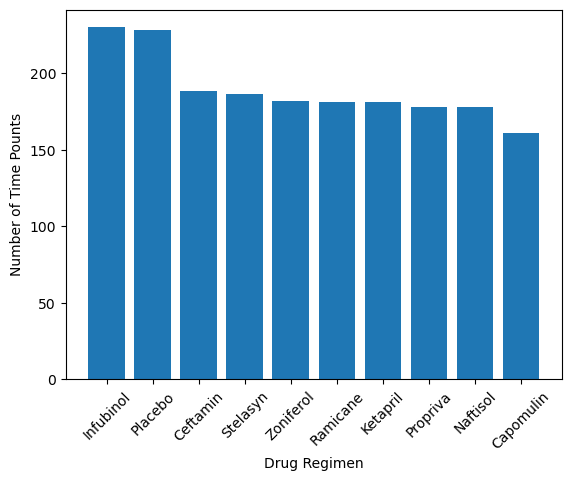

In [273]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Create list of drug names
drug_list= merged_data_df["Drug Regimen"].unique()
#Graph the drug list and counts
plt.bar(drug_list, drug_counts)
#Rotate x labels
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time Pounts")
plt.show()

<Axes: ylabel='count'>

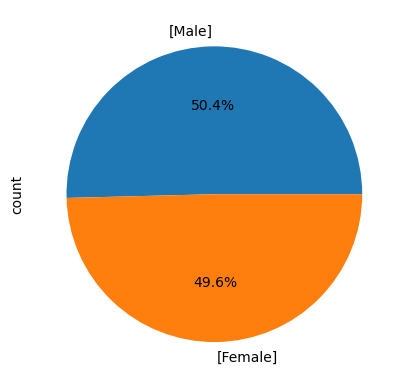

In [274]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_counts_ser= cleaned_mouse_df.groupby("Mouse ID")["Sex"].unique()
#Put series into a dataframe
sex_counts_df=pd.DataFrame(sex_counts_ser)
#Get counts for each sex
sex_counts = sex_counts_df["Sex"].value_counts()
# Make the pie chart
sex_counts.plot(kind = "pie", autopct = "%1.1f%%")

([<matplotlib.patches.Wedge at 0x14c6f463490>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

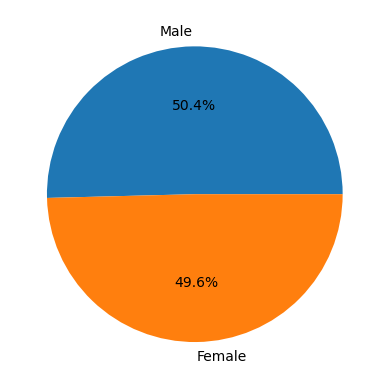

In [275]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_counts_ser= cleaned_mouse_df.groupby("Mouse ID")["Sex"].unique()
#Put series into a dataframe
sex_counts_df=pd.DataFrame(sex_counts_ser)
#Get counts for each sex
sex_counts = sex_counts_df["Sex"].value_counts()

# Make the pie chart
plt.pie(sex_counts, labels=["Male","Female"],autopct = "%1.1f%%")

## Quartiles, Outliers and Boxplots

In [293]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = cleaned_mouse_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
max_timepoint_df.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_merge_df = cleaned_mouse_df.merge(max_timepoint_df, on=["Mouse ID", "Timepoint"], how="inner")
#Reduce the dataframe to only the desired drug regimens
select_tumor_vol_df = tumor_volume_merge_df[tumor_volume_merge_df["Drug Regimen"].isin(drugs)]
select_tumor_vol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0


In [277]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol= select_tumor_vol_df.loc[select_tumor_vol_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset
    tumor_vol_data.append(tumor_vol)

    #Calculate quartiles and IQR
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    #Print the outliers for each drug
    print(f"Potential outliers for {drug}: {outliers}")
    

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


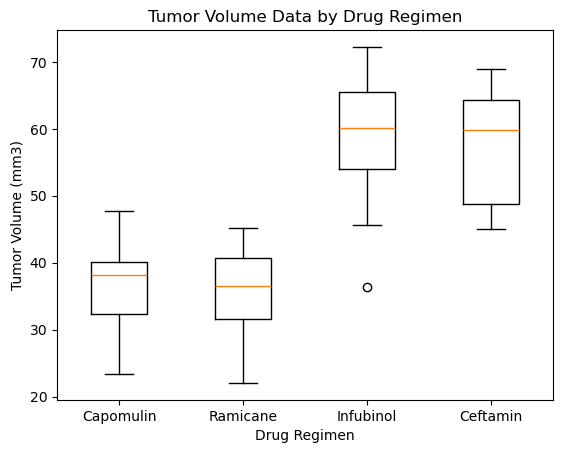

In [304]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    tumor_vol= select_tumor_vol_df.loc[select_tumor_vol_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset
    tumor_vol_data.append(tumor_vol)

#put subsets into a series
data = [tumor_vol_data[0], tumor_vol_data[1], tumor_vol_data[2], tumor_vol_data[3]]
#plot the graph 
plt.boxplot(data, labels = drugs)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Data by Drug Regimen")
plt.show()

## Line and Scatter Plots

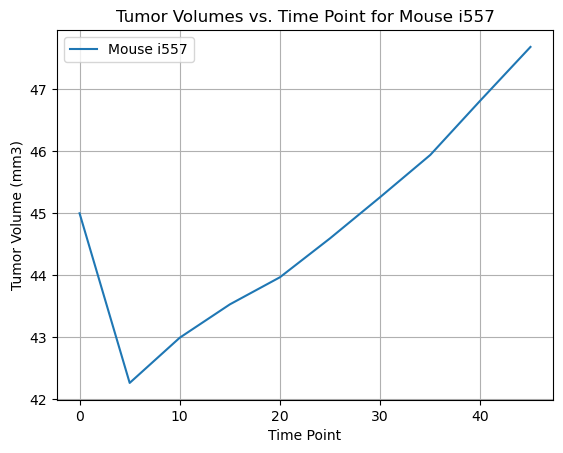

In [279]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_mouse_df[(cleaned_mouse_df["Drug Regimen"] == "Capomulin") & (cleaned_mouse_df["Mouse ID"] == "i557")]

#extract x and y values
time_points = capomulin_data["Timepoint"]
tumor_volumes = capomulin_data["Tumor Volume (mm3)"]

#plot the capomulin data
plt.plot(time_points, tumor_volumes, label = "Mouse i557")
plt.title("Tumor Volumes vs. Time Point for Mouse i557")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.grid(True)
plt.show()



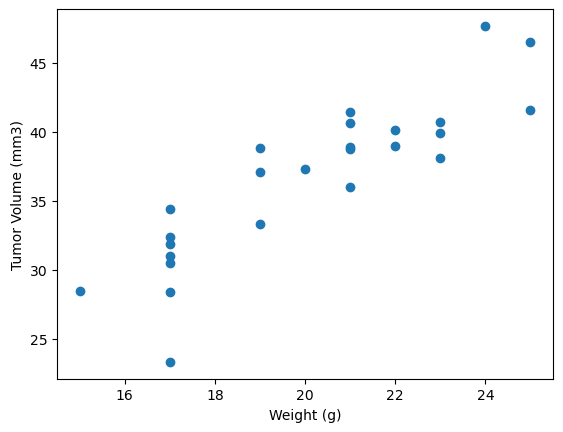

In [280]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_weight = tumor_volume_merge_df[(tumor_volume_merge_df["Drug Regimen"] == "Capomulin")]
capomulin_weight.head(100)
weight_and_tumor_vol = capomulin_weight[["Weight (g)", "Tumor Volume (mm3)"]]
weight = capomulin_weight["Weight (g)"]
tumor_vol = capomulin_weight["Tumor Volume (mm3)"]
plt.scatter(weight, tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

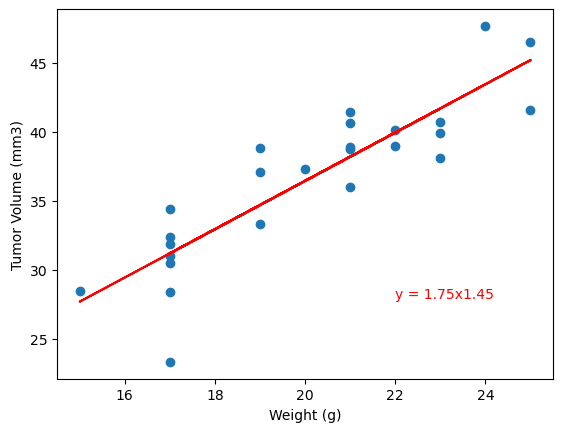

The correlation coefficient for this data is 0.877


In [292]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#use linregress to get values
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_vol)
#set y values for regression line
regress_values = weight * slope + intercept
#make regression line equation
line_eq = "y = " + str(round(slope, 2)) + "x" + str(round(intercept, 2))
#plot scatterplot
plt.scatter(weight, tumor_vol)
#plot regression line
plt.plot(weight, regress_values, "r-")
#label axes
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
#add equation of regression line
plt.annotate(line_eq, (22,28), color = "red")
plt.show()
#print r value
print(f"The correlation coefficient for this data is {round(rvalue, 3)}")